In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://data.ny.gov/Government-Finance/Lottery-Daily-Numbers-Win-4-Winning-Numbers-Beginn/hsys-3def
df1 = pd.read_json("https://data.ny.gov/resource/hsys-3def.json")

In [3]:
df1

,draw_date,midday_daily,evening_daily,midday_win_4,evening_win_4,midday_win_4_booster,evening_win_4_booster,midday_daily_booster,evening_daily_booster,midday_daily_sum,evening_daily_sum,midday_win_4_sum,evening_win_4_sum
0,2021-01-04T00:00:00.000,730,506,3074,2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-03T00:00:00.000,130,291,6566,1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-02T00:00:00.000,232,990,2367,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01T00:00:00.000,839,716,210,4556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-31T00:00:00.000,256,99,1951,3454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-04-09T00:00:00.000,485,464,244,9145,NaN,NaN,NaN,NaN,17.0,14.0,10.0,19.0
996,2018-04-08T00:00:00.000,978,824,1368,3597,NaN,NaN,NaN,NaN,24.0,14.0,18.0,24.0
997,2018-04-07T00:00:00.000,345,638,2824,3653,NaN,NaN,NaN,NaN,12.0,17.0,16.0,17.0
998,2018-04-06T00:00:00.000,956,688,1072,3831,NaN,NaN,NaN,NaN,20.0,22.0,10.0,15.0


In [11]:
df1["midday_daily"].value_counts().head(25)

174    7
232    5
261    5
40     5
736    5
819    4
725    4
218    4
257    4
182    4
926    4
834    4
318    4
333    4
350    4
442    4
441    4
705    4
31     4
603    4
695    4
683    4
276    3
832    3
302    3
Name: midday_daily, dtype: int64

In [21]:
#bedford
ser1 = df1["midday_daily"].apply(str)
ser1

0      730
1      130
2      232
3      839
4      256
      ... 
995    485
996    978
997    345
998    956
999    756
Name: midday_daily, Length: 1000, dtype: object

In [22]:
#add zero to numbers less than 100
ser1[ser1.apply(len) < 3] = '0' + ser1[ser1.apply(len) < 3]

In [23]:
ser1

0      730
1      130
2      232
3      839
4      256
      ... 
995    485
996    978
997    345
998    956
999    756
Name: midday_daily, Length: 1000, dtype: object

In [24]:
ser1[ser1.apply(len) < 3]

44     06
328    07
376    05
429    03
498    08
623    02
688    09
911    02
966    07
Name: midday_daily, dtype: object

In [25]:
#add another zero
ser1[ser1.apply(len) < 3] = '0' + ser1[ser1.apply(len) < 3]

In [26]:
ser1

0      730
1      130
2      232
3      839
4      256
      ... 
995    485
996    978
997    345
998    956
999    756
Name: midday_daily, Length: 1000, dtype: object

In [30]:
ser1.str.slice(0,1).value_counts()

2    113
4    111
5    104
0    104
7    102
1     99
9     98
3     94
6     88
8     87
Name: midday_daily, dtype: int64

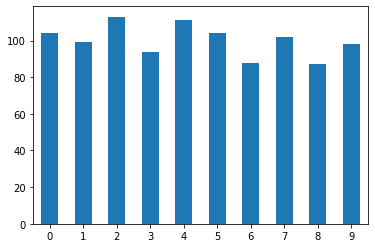

In [35]:
#DOES NOT FOLLOW BEDFORDS LAW
ser1.str.slice(0,1).value_counts().sort_index().plot(kind="bar",rot=0)

In [38]:
ser1.value_counts().head(20)

174    7
736    5
040    5
261    5
232    5
603    4
834    4
031    4
218    4
705    4
695    4
318    4
926    4
182    4
819    4
442    4
333    4
683    4
441    4
257    4
Name: midday_daily, dtype: int64

In [57]:
#351/1000 appear only once
ser1.value_counts().tail(351)

704    1
798    1
568    1
896    1
238    1
      ..
022    1
231    1
112    1
846    1
809    1
Name: midday_daily, Length: 351, dtype: int64

In [62]:
ser1.value_counts()

174    7
736    5
040    5
261    5
232    5
      ..
022    1
231    1
112    1
846    1
809    1
Name: midday_daily, Length: 625, dtype: int64

In [63]:
#instead of groupby
ser1.value_counts().value_counts()

1    351
2    202
3     50
4     17
5      4
7      1
Name: midday_daily, dtype: int64

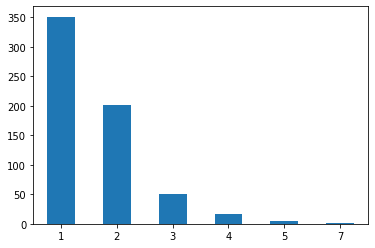

In [68]:
ser1.value_counts().value_counts().plot(kind="bar",rot=0)

### Analysis by each number

In [69]:
num1 = ser1.str.slice(0,1)
num2 = ser1.str.slice(1,2)
num3 = ser1.str.slice(2)

In [70]:
num1.value_counts()

2    113
4    111
5    104
0    104
7    102
1     99
9     98
3     94
6     88
8     87
Name: midday_daily, dtype: int64

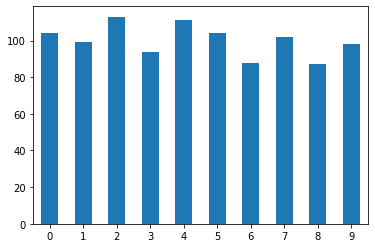

In [75]:
num1.value_counts().sort_index().plot(kind="bar",rot=0)

In [71]:
num2.value_counts()

3    108
4    105
2    104
8    104
5    100
0    100
9    100
1     98
6     91
7     90
Name: midday_daily, dtype: int64

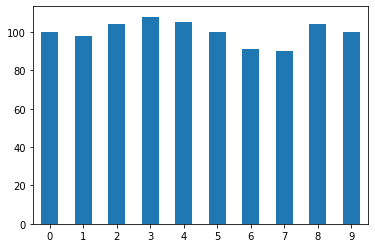

In [76]:
num2.value_counts().sort_index().plot(kind="bar",rot=0)

In [72]:
num3.value_counts()

1    110
4    107
2    106
5    106
7     99
8     98
6     97
3     97
9     96
0     84
Name: midday_daily, dtype: int64

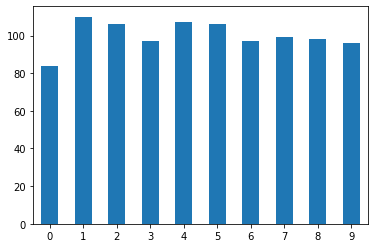

In [77]:
num3.value_counts().sort_index().plot(kind="bar",rot=0)